# 新冠疫情中国数据可视化 —— 何数学

#### 可视化采用pyecharts，已经运行出的结果在部分浏览器中可能无法渲染，不过运行时能正常产生图片结果

## Part 1. 数据获取
* 截至2020.3.30
* 数据获取部分代码来源于他人博客：https://blog.csdn.net/vdrere/article/details/104704571
* 原数据来自腾讯：https://news.qq.com/zt2020/page/feiyan.htm#/?pool=hb&nojump=1

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import csv

In [2]:
def catch_data1():
    # url_1包含中国各省市当日实时数据(也有全球数据，但是腾讯改版后好久没更新了)
    url_1 = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
    response = requests.get(url=url_1).json()
    data_1 = json.loads(response['data'])
    return data_1
data_1 = catch_data1()

def catch_data2():
    # url_2包含全球实时数据及历史数据、中国历史数据及每日新增数据
    url_2 = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_other'
    data_2 = json.loads(requests.get(url=url_2).json()['data'])
    return data_2
data_2 = catch_data2()

lastUpdateTime = data_1["lastUpdateTime"]  # 腾讯最近更新时间
directory = "./data/" # 定义数据保存路径

* **获取中国各省、各城市当日实时数据**

In [3]:
# 获取中国当日实时数据
china_data = data_1["areaTree"][0]["children"]
## 获取中国各城市当日实时数据
filename = directory + lastUpdateTime.split(' ')[0] + "_china_city_data.csv"
with open(filename, "w+", encoding="utf_8_sig", newline="") as csv_file:
    writer = csv.writer(csv_file)
    header = ["province", "city_name", "total_confirm", "total_suspect", "total_dead", "dead_rate", "total_heal", "heal_rate",
              "today_confirm", "lastUpdateTime"]
    writer.writerow(header)
    for j in range(len(china_data)):
        province = china_data[j]["name"]  # 省份
        city_list = china_data[j]["children"]  # 该省份下面城市列表
        for k in range(len(city_list)):
            city_name = city_list[k]["name"]  # 城市名称
            total_confirm = city_list[k]["total"]["confirm"]  # 总确诊病例
            total_suspect = city_list[k]["total"]["suspect"]  # 总疑似病例
            total_dead = city_list[k]["total"]["dead"]  # 总死亡病例
            dead_rate = city_list[k]["total"]["deadRate"] 
            total_heal = city_list[k]["total"]["heal"]  # 总治愈病例
            heal_rate = city_list[k]["total"]["healRate"] 
            today_confirm = city_list[k]["today"]["confirm"]  # 今日确诊病例
            data_row = [province, city_name, total_confirm, total_suspect, total_dead, dead_rate,
                        total_heal, heal_rate, today_confirm, lastUpdateTime]
            writer.writerow(data_row)
## 获取中国各省当日实时数据
filename = directory + lastUpdateTime.split(' ')[0] + "_china_province_data.csv"
with open(filename, "w+", encoding="utf_8_sig", newline="") as csv_file:
    writer = csv.writer(csv_file)
    header = ["province", "total_confirm", "total_suspect", "total_dead", "total_heal", "now_confirm",
              "today_confirm", "lastUpdateTime"]
    writer.writerow(header)
    for i in range(len(china_data)):
        province = china_data[i]["name"]  # 省份
        total_confirm = china_data[i]["total"]["confirm"]  # 总确诊病例
        total_suspect = china_data[i]["total"]["suspect"]  # 总疑似病例
        total_dead = china_data[i]["total"]["dead"]  # 总死亡病例
        total_heal = china_data[i]["total"]["heal"]  # 总治愈病例
        now_confirm = china_data[i]["total"]["nowConfirm"]  # 现存确诊病例
        today_confirm = china_data[i]["today"]["confirm"]  # 今日确诊病例
        data_row = [province, total_confirm, total_suspect, total_dead, total_heal, now_confirm, today_confirm, lastUpdateTime]
        writer.writerow(data_row)

* **获取中国历史数据、每日新增数据**

In [4]:
# 获取中国历史数据及每日新增数据
chinaDayList = pd.DataFrame(data_2["chinaDayList"])  # 中国历史数据
filename = directory + lastUpdateTime.split(' ')[0] + "_china_history_data.csv"
header = ["date", "confirm", "suspect", "dead", "heal", "nowConfirm", "nowSevere", "deadRate", "healRate"]
chinaDayList = chinaDayList[header]  # 重排数据框列的顺序
chinaDayList.to_csv(filename, encoding="utf_8_sig", index=False)

chinaDayAddList = pd.DataFrame(data_2["chinaDayAddList"])  # 中国每日新增数据
filename = directory + lastUpdateTime.split(' ')[0] + "_china_DayAdd_data.csv"
header = ["date", "confirm", "suspect", "dead", "heal", "deadRate", "healRate"]
chinaDayAddList = chinaDayAddList[header]  # 重排数据框列的顺序
chinaDayAddList.to_csv(filename, encoding="utf_8_sig", index=False)

* **获取湖北与非湖北历史数据、每日新增数据**

In [5]:
# 湖北与非湖北历史数据
def get_data_1():
    with open(filename, "w+", encoding="utf_8_sig", newline="") as csv_file:
        writer = csv.writer(csv_file)
        header = ["date", "dead", "heal", "nowConfirm", "deadRate", "healRate"]  # 定义表头
        writer.writerow(header)
        for i in range(len(hubei_notHhubei)):
            data_row = [hubei_notHhubei[i]["date"], hubei_notHhubei[i][w]["dead"], hubei_notHhubei[i][w]["heal"],
                        hubei_notHhubei[i][w]["nowConfirm"], hubei_notHhubei[i][w]["deadRate"],
                        hubei_notHhubei[i][w]["healRate"]]
            writer.writerow(data_row)

hubei_notHhubei = data_2["dailyHistory"]  # 湖北与非湖北历史数据
for w in ["hubei", "notHubei"]:
    filename = directory + lastUpdateTime.split(' ')[0] + "_" + w + "_history_data.csv"
    get_data_1()

# 获取湖北省与非湖北每日新增数据
hubei_DayAdd = pd.DataFrame(data_2["dailyNewAddHistory"])  # 中国历史数据
filename = directory + lastUpdateTime.split(' ')[0] + "_hubei_notHubei_DayAdd_data.csv"
hubei_DayAdd.to_csv(filename, encoding="utf_8_sig", index=False)

* **获取武汉与非武汉每日新增数据**

In [6]:
# 获取武汉与非武汉每日新增数据
wuhan_DayAdd = data_2["wuhanDayList"]
filename = directory + lastUpdateTime.split(' ')[0] + "_wuhan_notWuhan_DayAdd_data.csv"
with open(filename, "w+", encoding="utf_8_sig", newline="") as csv_file:
    writer = csv.writer(csv_file)
    header = ["date", "wuhan", "notWuhan", "notHubei"]  # 定义表头
    writer.writerow(header)
    for i in range(len(wuhan_DayAdd)):
        data_row = [wuhan_DayAdd[i]["date"], wuhan_DayAdd[i]["wuhan"]["confirmAdd"],
                    wuhan_DayAdd[i]["notWuhan"]["confirmAdd"], wuhan_DayAdd[i]["notHubei"]["confirmAdd"], ]
        writer.writerow(data_row)

## Part 2. 数据可视化

### 2.1 截至3.30，全国各省累计与现存确诊病例的地图可视化

In [7]:
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [8]:
china_province_data = pd.read_csv("./data/2020-03-30_china_province_data.csv")
china_province_data.head()

,province,total_confirm,total_suspect,total_dead,total_heal,now_confirm,today_confirm,lastUpdateTime
0,湖北,67801,0,3186,62882,1733,0,2020-03-30 15:37:23
1,香港,641,0,4,118,519,59,2020-03-30 15:37:23
2,台湾,306,0,5,39,262,23,2020-03-30 15:37:23
3,上海,498,0,5,338,155,6,2020-03-30 15:37:23
4,北京,577,0,8,415,154,1,2020-03-30 15:37:23


In [9]:
map = Map().add("人数", 
                [list(z) for z in zip(china_province_data['province'], china_province_data['total_confirm'])], 
                "china").set_global_opts(title_opts=opts.TitleOpts(title="国内累计确诊案例分布地图-截至3.30"),                                                                                                                                              visualmap_opts=opts.VisualMapOpts(
                ## 传入指定分段的范围，且每个分段显示的标签及填充的颜色
                pieces=[
                {"value":0,"label":"0","color":"#FFFFFF"},
                {"min":1,"max":9,"label":"1-9人","color":"#fcebcf"},
                {"min":10,"max":99,"label":"10-99人","color":"#f59e83"},
                {"min":100,"max":499,"label":"100-499人","color":"#e45a4f"},
                {"min":500,"max":999,"label":"500-999人","color":"#cb2b2f"},
                {"min":1000,"max":9999,"label":"1000-9999人","color":"#811c24"},
                {"min":10000,"label":"10000人以上","color":"#4f060d"}
                ],
                ## 设置分段显示
                is_piecewise=True),
        ## 设置提示框内容
        tooltip_opts=opts.TooltipOpts(
            formatter='省份：{b} 累计确诊：{c}',
            )
        )
map.render_notebook()

In [10]:
map = Map().add("人数", 
                [list(z) for z in zip(china_province_data['province'], china_province_data['now_confirm'])], 
                "china").set_global_opts(title_opts=opts.TitleOpts(title="国内现存确诊案例分布地图-截至3.30"),                                                                                                                                              visualmap_opts=opts.VisualMapOpts(
                ## 传入指定分段的范围，且每个分段显示的标签及填充的颜色
                pieces=[
                {"value":0,"label":"0","color":"#FFFFFF"},
                {"min":1,"max":9,"label":"1-9人","color":"#FFF8DC"},
                {"min":10,"max":49,"label":"10-49人","color":"#F5DEB3"},
                {"min":50,"max":99,"label":"50-99人","color":"#FFD700"},
                {"min":100,"max":499,"label":"100-499人","color":"#EE9A00"},
#                 {"min":500,"max":1000,"label":"1000-9999人","color":"#811c24"},
                {"min":1000,"label":"湖北现存病例：1733","color":"#CD5B45"}
                ],
                ## 设置分段显示
                is_piecewise=True),
        ## 设置提示框内容
        tooltip_opts=opts.TooltipOpts(
            formatter='省份：{b} 现存确诊：{c}',
            )
        )
map.render_notebook()

### 2.2 截至3.30，全国各省累计病例对数数据柱状图，包括累计确诊、死亡、治愈病例
* **0与1的对数值在此处均显示为0**

In [12]:
# 处理数据形式，并使数据按确诊人数排序
province_data = china_province_data[['province','total_confirm','total_dead','total_heal']]
sorted_df = province_data.sort_values(by='total_confirm') 

bar=(
     Bar(init_opts=opts.InitOpts(width="900px",height="800px"))
        .add_xaxis(list(sorted_df['province']))
        .add_yaxis("累计确诊病例对数值", list(np.log(sorted_df['total_confirm'])),gap="0%")
        .add_yaxis("累计治愈病例对数值", list(np.log(sorted_df['total_heal'])),gap="0%")
        .add_yaxis("累计死亡病例对数值", list(np.log(sorted_df['total_dead'])),gap="0%")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False),
                         markline_opts=opts.MarkLineOpts(
                             linestyle_opts = opts.LineStyleOpts(opacity = 0.3, type_ = 'dashed'),
                             data=[opts.MarkLineItem(x=np.log(1000), name="病例=1000"),
                                  opts.MarkLineItem(x=np.log(400), name="病例=400"),]))
        .set_global_opts(title_opts=opts.TitleOpts(title="各省病例对数数据柱状图", 
                                                   subtitle="截至3.30（注：0与1的对数值在此处均显示为0；两条虚线分别对应实际病例数400与1000）"),
                        xaxis_opts=opts.AxisOpts(name="病例对数值"),)
     )
bar.reversal_axis() 
bar.render_notebook()

 **由上图可看出（截至3.30）：**
* **确诊在400~1000例的省份有安徽、江西、山东、江苏、香港、重庆、北京、四川、上海、黑龙江；**
* **确诊超1000例的省份有广东、河南、浙江、湖南，以及湖北；**
* **死亡不超过1例的省份包括青海、宁夏、西藏、江西、山西、吉林、江苏、内蒙古、浙江、澳门、福建；**
* **结合确诊病例与死亡病例，可以看出江苏、浙江、江西在病情治疗方面做得极其出色。**

### 2.3 武汉与非武汉、湖北与非湖北 每日新增确诊病例数据折线图

**2.3.1 数据读入与处理**

In [13]:
HB_CN_dayadd = pd.read_csv('./data/2020-03-30_hubei_notHubei_DayAdd_data.csv')
HB_CN_dayadd

,date,hubei,country,notHubei
0,1.20,72,77,5
1,1.21,105,149,44
2,1.22,69,131,62
3,1.23,105,259,154
4,1.24,180,444,264
...,...,...,...,...
65,3.25,0,114,114
66,3.26,0,118,118
67,3.27,0,135,135
68,3.28,0,128,128


In [14]:
WH_CN_dayadd = pd.read_csv('./data/2020-03-30_wuhan_notWuhan_DayAdd_data.csv')
WH_CN_dayadd

,date,wuhan,notWuhan,notHubei
0,1.21,60,12,44
1,1.22,105,0,62
2,1.23,62,7,154
3,1.24,70,35,264
4,1.25,77,102,365
...,...,...,...,...
65,3.26,0,0,118
66,3.27,0,0,135
67,3.28,0,0,128
68,3.29,0,0,106


**两者日期未对齐，经与其他数据源校对发现，原因是武汉与非武汉的excel日期字段都记晚了一天，实际上表格的日期同湖北与非湖北的日期是对应的。**   
**将两个表合并，只留下日期与武汉、湖北、全国单日新增病例。**

In [15]:
WH_CN_dayadd.drop(['date'],axis =1, inplace = True)
WH_HB_CN = pd.concat([HB_CN_dayadd,WH_CN_dayadd],axis=1)
WH_HB_CN = WH_HB_CN[['date','wuhan','hubei','country']]

tmp = [str(x) for x in list(WH_HB_CN['date'])]
date = [x+'0' if len(x)==3 else x for x in tmp]  # 为了让10结尾的日期末尾的0不被省略
WH_HB_CN.date = pd.Series(date)

WH_HB_CN

,date,wuhan,hubei,country
0,1.20,60,72,77
1,1.21,105,105,149
2,1.22,62,69,131
3,1.23,70,105,259
4,1.24,77,180,444
...,...,...,...,...
65,3.25,0,0,114
66,3.26,0,0,118
67,3.27,0,0,135
68,3.28,0,0,128


**2.3.2 折线图绘制**

In [16]:
line = (
        Line()
        .add_xaxis(list(WH_HB_CN['date']))
        .add_yaxis('武汉', WH_HB_CN['wuhan'], areastyle_opts=opts.AreaStyleOpts(opacity=0.5), symbol_size = 5)
        .add_yaxis('湖北',WH_HB_CN['hubei'], areastyle_opts=opts.AreaStyleOpts(opacity=0.5), symbol_size = 5)
        .add_yaxis('全国',WH_HB_CN['country'], areastyle_opts=opts.AreaStyleOpts(opacity=0.5), symbol_size = 5)
        .set_global_opts(title_opts=opts.TitleOpts(title="武汉、湖北、全国每日新增确诊病例折线图",subtitle="2.12起包含临床诊断确诊人数"),
                         xaxis_opts=opts.AxisOpts(
                             name='日期',
                             axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
                             is_scale=False,
                             boundary_gap=False,),
                         yaxis_opts=opts.AxisOpts(max_=16000, interval=4000,splitline_opts=opts.SplitLineOpts(is_show=True)),
                         legend_opts=opts.LegendOpts(pos_right=100,pos_top=30,orient='vertical',item_gap=20))
        .set_series_opts(
            areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(coord=['2.12',15153],value='2.12')],symbol_size=[50,50])
        )
)
line.render_notebook()

2020年2月12日0时-24时，湖北省新增新冠肺炎病例14840例（含临床诊断病例13332例），其中武汉市共新增确诊13436例。武汉市和湖北省一天增加这么多的确诊病例，原因是统计口径发生了改变，《新型冠状病毒感染的肺炎诊疗方案（试行第五版）》在湖北省的病例诊断分类中增加了“临床诊断”，临床诊断病例为疑似病例具有肺炎影像学特征者。2月12日的统计把临床诊断病例增加为确诊病例。

中央指导组专家、北京朝阳医院童朝晖副院长解释称，临床诊断病例并非新鲜概念，其实在日常的肺炎诊断工作中，能够依据病原学进行诊断的病例也就20%-30%，大多数病例都要临床医生进行临床诊断。因此，此次把临床诊断纳入标准，有益于临床医生对疾病诊断的判断。
童副院长指出，过去湖北病例疑似多确诊少，是因为主要靠核酸进行确诊检测，但实际上有很大一部分的疑似病例都有符合临床诊断标准的表现，如：1、流行病学史；2、发热，呼吸道咳嗽、憋气等临床症状；3、查临床体征；4、CT影像。临床医生通常会根据这些情况最终做出一个综合的诊断，而这种诊断在日常工作中是占了诊断大头的。

本次把临床诊断病例也列为确诊病例，让临床诊断病例人也得到很好的治疗，有助于控制湖北省的疫情，增加治愈率，减少致死率。

（信息来源： 湖北省卫生健康委员会 / 财新网 / 新京报）

**由上图可以清晰看出，二月中旬之前，湖北疫情在全国疫情中的占比在2/3以上，在2.12大规模将临床诊断病例纳入确诊病例后，占比甚至超过95%；武汉疫情在湖北疫情中的占比在1/2及以上，在2.12时占比甚至超过90%。将临床诊断病例纳入确诊病例可谓必要，由于2.12之前确诊方式仅限于核酸检测，因此有大量患病者未确诊，甚至出现如2.04-2.11期间确诊人数整体呈下降趋势的迷惑性情况。**

**将坐标轴限制在1000以内，折线图如下：**

In [17]:
line = (
        Line()
        .add_xaxis(list(WH_HB_CN['date']))
        .add_yaxis('武汉',WH_HB_CN['wuhan'],is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5), symbol_size = 6)
        .add_yaxis('湖北',WH_HB_CN['hubei'], is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5), symbol_size = 6)
        .add_yaxis('全国',WH_HB_CN['country'], is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5), symbol_size = 6)
        .set_global_opts(title_opts=opts.TitleOpts(title="武汉、湖北、全国每日新增确诊病例折线图",subtitle="2.12起包含临床诊断确诊人数"),
                         xaxis_opts=opts.AxisOpts(
                             name='日期',
                             axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
                             is_scale=False,
                             boundary_gap=False,),
                         yaxis_opts=opts.AxisOpts(max_ = 1000, splitline_opts=opts.SplitLineOpts(is_show=True)),
                         legend_opts=opts.LegendOpts(pos_right=100,pos_top=30,orient='vertical',item_gap=20)
                        )
        .set_series_opts(
            areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
            label_opts=opts.LabelOpts(is_show=False),
        )
)
line.render_notebook()

**若把坐标轴限制在1000以内，则很明显地可以看出二月下旬至三月初，全国疫情集中于湖北，湖北疫情集中于武汉，说明全国非湖北以外地区已经控制住。三月下旬开始，湖北疫情新增数量也逐渐归零，而非湖北地区确诊病例增长，即境外输入病例增多。**

### 2.4 全国确诊、疑似、治愈、死亡折线图

In [18]:
china_history_data = pd.read_csv('./data/2020-03-30_china_history_data.csv')
tmp = [str(x) for x in list(china_history_data['date'])]
date = [x+'0' if len(x)==3 else x for x in tmp]  # 为了让10结尾的日期末尾的0不被省略
china_history_data.date = pd.Series(date)

china_history_data

,date,confirm,suspect,dead,heal,nowConfirm,nowSevere,deadRate,healRate
0,1.13,41,0,1,0,0,0,2.4,0.0
1,1.14,41,0,1,0,0,0,2.4,0.0
2,1.15,41,0,2,5,0,0,4.9,12.2
3,1.16,45,0,2,8,0,0,4.4,17.8
4,1.17,62,0,2,12,0,0,3.2,19.4
...,...,...,...,...,...,...,...,...,...
72,3.25,81960,159,3293,74196,4471,1235,4.0,90.5
73,3.26,82078,189,3298,74737,4043,1034,4.0,91.1
74,3.27,82213,184,3301,75122,3790,921,4.0,91.4
75,3.28,82341,174,3306,75600,3435,742,4.0,91.8


In [19]:
line = (
    Line(init_opts=opts.InitOpts(width="900px",height="350px"))
    .add_xaxis(list(china_history_data['date']))
    .add_yaxis('累计确诊', china_history_data['confirm'])
    .add_yaxis('现有确诊',china_history_data['nowConfirm'])
    .add_yaxis('现有疑似',china_history_data['suspect'])
    .add_yaxis('现有重症',china_history_data['nowSevere'])
    .set_global_opts(title_opts=opts.TitleOpts(title="全国确诊、疑似、重症病例折线图"),
                     xaxis_opts=opts.AxisOpts(name='日期'),
                    yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
                    legend_opts=opts.LegendOpts(pos_right=90,pos_top=30,item_gap=20))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
line.render_notebook()

In [20]:
line = (
    Line(init_opts=opts.InitOpts(width="800px",height="400px"))
    .add_xaxis(list(china_history_data['date']))
    .add_yaxis('累计治愈', china_history_data['heal'])
    .add_yaxis('累计死亡',china_history_data['dead'])
    .set_global_opts(title_opts=opts.TitleOpts(title="全国累计治愈、死亡折线图"),
                     xaxis_opts=opts.AxisOpts(name='日期'),
                    yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
                    legend_opts=opts.LegendOpts(pos_right=90,pos_top=30,item_gap=20))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
line.render_notebook()

In [21]:
line = (
    Line(init_opts=opts.InitOpts(width="800px",height="400px"))
    .add_xaxis(list(china_history_data['date']))
    .add_yaxis('治愈率', china_history_data['healRate'])
    .add_yaxis('病死率',china_history_data['deadRate'])
    .set_global_opts(title_opts=opts.TitleOpts(title="全国治愈率、病死率折线图"),
                     xaxis_opts=opts.AxisOpts(name='日期'),
                    yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True),name='百分比'),
                    legend_opts=opts.LegendOpts(pos_right=90,pos_top=30,item_gap=20))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
line.render_notebook()

**由以上三个折线图，可以清晰看到全国范围内总的疫情走势。自二月中旬开始，确诊病例存量数据开始下降，疑似病例存量数据也在三月落至一千以内，并一直保持低位下降。于此同时，伴随着的是治愈人数与治愈率的明显提升。**

### 2.5 湖北地区与非湖北大陆地区的治愈率、病死率箱线图（不包含近期的境外输入病例）
**湖北省共辖13个地级行政区，包括12个地级市、1个自治州，分别是武汉市、黄石市、十堰市、宜昌市、襄阳市、鄂州市、荆门市、孝感市、荆州市、黄冈市、咸宁市、随州市、恩施土家族苗族自治州；4个省直辖县级行政单位，包括3个县级市、1个林区，分别是仙桃市、潜江市、天门市、神农架林区。**
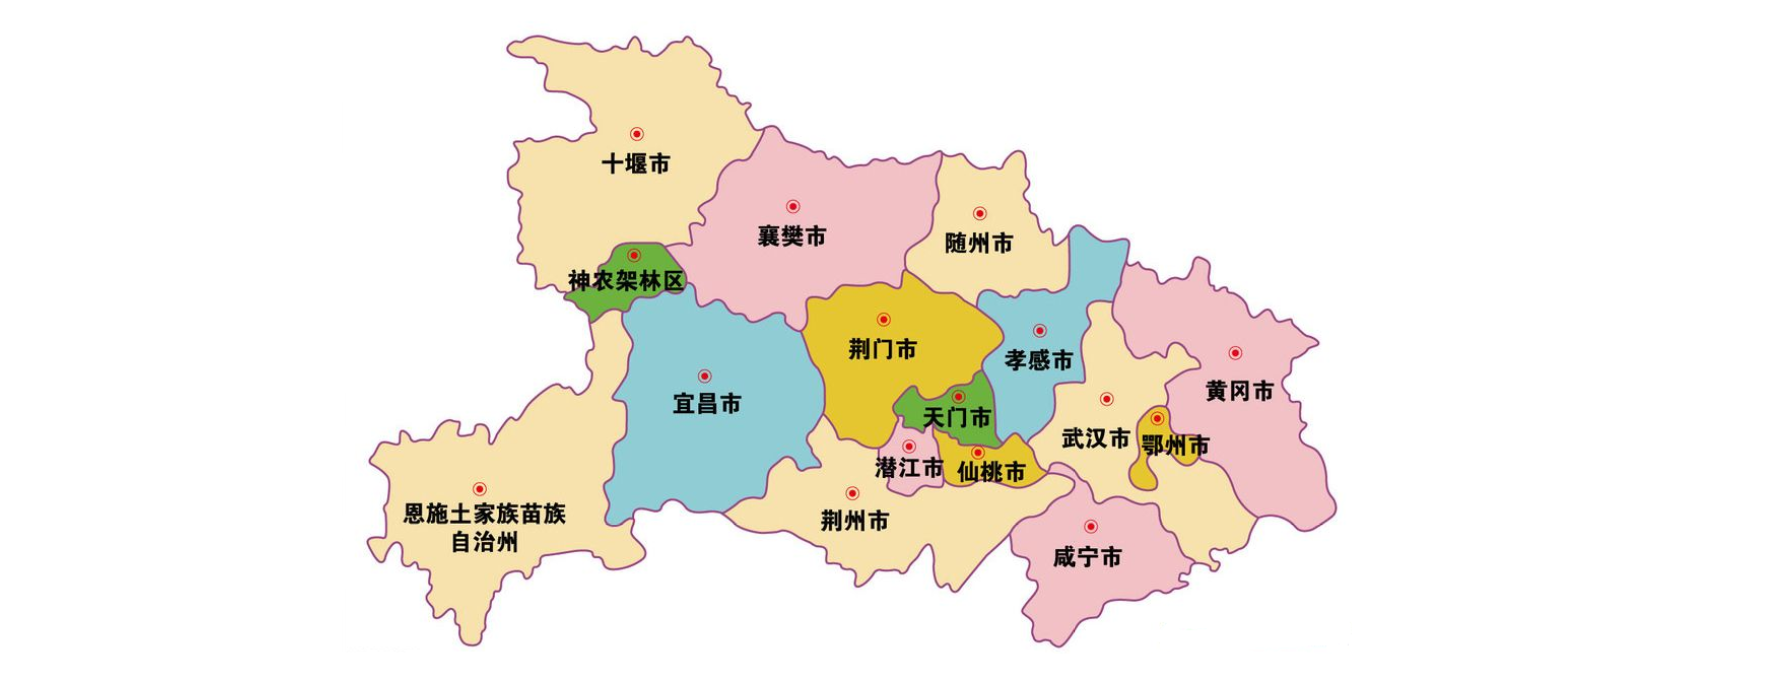


**剔除近期境外输入病例之后，各省份对于疫情前期累积的病例已经逐渐消化，疫情得到基本控制，因此用箱线图比较目前湖北省内17个城市与湖北省外大陆各省份的治愈率与病死率。其中，湖北省外大陆省份的治愈率计算不包括近期的境外输入病例，因最近的境外输入确诊病例大多仍处于治疗中。**

**检查数据，发现city_name包括“境外输入”，在此删去。**

In [22]:
city_data = pd.read_csv('./data/2020-03-30_china_city_data.csv')
city_data = city_data.drop(city_data[city_data.city_name == '境外输入'].index)
city_data

,province,city_name,total_confirm,total_suspect,total_dead,dead_rate,total_heal,heal_rate,today_confirm,lastUpdateTime
0,湖北,武汉,50006,0,2547,5.09,45733,91.46,0,2020-03-30 15:37:23
1,湖北,鄂州,1394,0,59,4.23,1333,95.62,0,2020-03-30 15:37:23
2,湖北,宜昌,931,0,36,3.87,894,96.03,0,2020-03-30 15:37:23
3,湖北,孝感,3518,0,128,3.64,3389,96.33,0,2020-03-30 15:37:23
4,湖北,荆门,928,0,40,4.31,887,95.58,0,2020-03-30 15:37:23
...,...,...,...,...,...,...,...,...,...,...
444,新疆,六师五家渠,2,0,0,0.00,2,100.00,0,2020-03-30 15:37:23
445,新疆,兵团第十二师,3,0,0,0.00,3,100.00,0,2020-03-30 15:37:23
446,新疆,巴州,3,0,0,0.00,3,100.00,0,2020-03-30 15:37:23
447,新疆,第七师,1,0,0,0.00,1,100.00,0,2020-03-30 15:37:23


In [23]:
# 获取大陆各省份的治愈率（不包括境外输入）
province_ = list(city_data['province'].unique())
province_.remove('湖北')
province_.remove('香港')
province_.remove('台湾')
province_.remove('澳门')

notHB_cure_rate = []
notHB_death_rate = []
for name in province_:
    tmp_df = city_data[(city_data.province == name) & (city_data.city_name != '境外输入')]
    cure_rate = round(100 * sum(tmp_df.total_heal) / sum(tmp_df.total_confirm),2) # 计算除去境外输入之后的治愈率
    death_rate = round(100 * sum(tmp_df.total_dead) / sum(tmp_df.total_confirm),2) # 计算除去境外输入之后的治愈率
    notHB_cure_rate.append(cure_rate)
    notHB_death_rate.append(death_rate)

HB_cure_rate = list(city_data[city_data.province == '湖北'].heal_rate)
HB_death_rate = list(city_data[city_data.province == '湖北'].dead_rate)

In [24]:
cure_df = pd.DataFrame([list(z) for z in zip(province_, notHB_cure_rate)],columns=['province','cure_rate'])
sorted_cure = cure_df.sort_values(by='cure_rate')
print("非湖北地区治愈率最低的省份是（不包括近期境外输入）:\n\n",sorted_cure.iloc[0,:])

print('-'*50)

HBcity = list(city_data[city_data.province == '湖北'].city_name)
HBcure_df = pd.DataFrame([list(z) for z in zip(HBcity, HB_cure_rate)],columns=['hubei_city','cure_rate'])
sorted_HBcure = HBcure_df.sort_values(by='cure_rate')
print("湖北地区治愈率最低的城市是（无近期境外输入）:\n\n",sorted_HBcure.iloc[0,:])

非湖北地区治愈率最低的省份是（不包括近期境外输入）:

 province        广东
cure_rate    91.04
Name: 2, dtype: object
--------------------------------------------------
湖北地区治愈率最低的城市是（无近期境外输入）:

 hubei_city       武汉
cure_rate     91.46
Name: 0, dtype: object


In [44]:
box = (
    Boxplot(init_opts=opts.InitOpts(width="400px",height="400px"))
    .add_xaxis(['治愈率'])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="湖北内各城市与非湖北大陆省份治愈率(%)箱线图",subtitle="不包含港澳台地区，不包括近期境外输入病例"),
        yaxis_opts=opts.AxisOpts(min_ = 90),
        legend_opts=opts.LegendOpts(pos_right=0,pos_top=30,item_gap=10,orient='vertical'))
)
box.add_yaxis("湖北", box.prepare_data([HB_cure_rate]))
box.add_yaxis("非湖北", box.prepare_data([notHB_cure_rate]))
box.render_notebook()

**非湖北大陆省份中治愈率最低的省份为广东，治愈率为91.04%，湖北地区治愈率最低的城市为武汉，治愈率为91.46%。**  
**由于疫情前期在湖北武汉爆发的压力过大，最初的治疗力度与防疫工作无法迅速跟上，因此总体来看，非湖北大陆省份的治愈率明显高于湖北地区。**

In [26]:
death_df = pd.DataFrame([list(z) for z in zip(province_, notHB_death_rate)],columns=['province','death_rate'])
sorted_death = death_df.sort_values(by='death_rate',ascending=False)
print("非湖北地区病死率最高的是（不包括近期境外输入）:\n\n",sorted_death.iloc[0,:])

print('-'*50)

HBdeath_df = pd.DataFrame([list(z) for z in zip(HBcity, HB_death_rate)],columns=['hubei_city','death_rate'])
sorted_HBdeath = HBdeath_df.sort_values(by='death_rate',ascending=False)
print("湖北地区病死率最高的城市是（无近期境外输入）:\n\n",sorted_HBdeath.iloc[0,:])

非湖北地区病死率最高的是（不包括近期境外输入）:

 province        新疆
death_rate    3.95
Name: 29, dtype: object
--------------------------------------------------
湖北地区病死率最高的城市是（无近期境外输入）:

 hubei_city      武汉
death_rate    5.09
Name: 0, dtype: object


In [45]:
box = (
    Boxplot(init_opts=opts.InitOpts(width="400px",height="400px"))
    .add_xaxis(['病死率'])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="湖北内各城市与非湖北大陆省份病死率(%)箱线图",subtitle="不包含港澳台地区，不包括近期境外输入病例"),
        yaxis_opts=opts.AxisOpts(max_ = 6),
        legend_opts=opts.LegendOpts(pos_right=0,pos_top=30,item_gap=10,orient='vertical'))
)
box.add_yaxis("湖北地区", box.prepare_data([HB_death_rate]))
box.add_yaxis("非湖北地区", box.prepare_data([notHB_death_rate]))
box.render_notebook()

**非湖北大陆省份中病死率最高的省份为新疆，病死率为3.95%，湖北地区病死率最高的城市为武汉，率为5.09%。**  
**由于疫情前期在湖北武汉爆发的压力过大，最初的治疗力度与防疫工作无法迅速跟上，因此总体来看，湖北地区的病死率明显高于非湖北大陆省份。**

### 2.6 全国各省目前治愈率与病死率玫瑰图

**全国各省目前治愈率玫瑰图**

In [28]:
# 处理数据形式，并使数据按降序排序
total_heal = china_province_data['total_heal']
total_confirm = china_province_data['total_confirm']
province = china_province_data['province']

cure_rate = [round(100*x,1) for x in total_heal / total_confirm]
cure_df = pd.DataFrame([list(z) for z in zip(province, cure_rate)],columns=['province','cure_rate'])
cure_sorted_df = cure_df.sort_values(by='cure_rate',ascending=False) 

# 颜色设置
color= ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
                '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
                '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#6A368B'
                '#7D3990','#A63F98','#C31C88','#D52178','#D5225B',
                '#D02C2A','#D44C2D','#F57A34','#FA8F2F']   

pie=(
     Pie(init_opts=opts.InitOpts(width='1300px',height='800px')) # 设置大小
     .add('',[list(z) for z in zip(cure_sorted_df['province'], cure_sorted_df['cure_rate'])],
          rosetype='area',# radius：扇区圆心角展现数据的百分比，半径展现数据的大小，area：所有扇区圆心角相同，仅通过半径展现数据大小
          radius=['25%','95%'],  # 饼图的内外半径
          center=['30%','50%']  # 饼图的中心坐标
          )
     .set_global_opts(title_opts=opts.TitleOpts(title='   全国各省\n治愈率百分比',                                        
                                                title_textstyle_opts=opts.TextStyleOpts(
                                                    color='black',
                                                    font_size=28,
                                                    font_style='normal',
                                                    font_weight='bold',
                                                    font_family='Microsoft Yahei'
                                                ),
                                                pos_left='23.5%',pos_top='45.5%'
                                               ),
                      legend_opts=opts.LegendOpts(is_show=False)                                                                          
                      )
     .set_series_opts(label_opts=opts.LabelOpts(
         position='inside',
         font_size=12.8,
         font_style='normal',
         font_weight='bolder',
         font_family='Microsoft Yahei',
         formatter='{b}\n{c}'
     )
                     )
     .set_colors(color) ##设置颜色系列
     )
                                                
pie.render_notebook()

**全国大陆各省目前治愈率玫瑰图（不包括境外输入病例）**

In [30]:
# 若不包括境外输入病例，不包括港澳台

province_ = list(city_data['province'].unique())
province_.remove('湖北')
province_.remove('香港')
province_.remove('台湾')
province_.remove('澳门')

hb = china_province_data[china_province_data.province == '湖北']
province_ = province_+['湖北']
cure_rate = notHB_cure_rate+[round(float(hb.total_heal / hb.total_confirm)*100,2)]  # 经过检查，湖北省近期没有境外输入病例

# total_heal = china_province_data['total_heal']
# total_confirm = china_province_data['total_confirm']
# province = china_province_data['province']

# cure_rate = [round(100*x,1) for x in total_heal / total_confirm]
cure_df = pd.DataFrame([list(z) for z in zip(province_, cure_rate)],columns=['province','cure_rate'])
cure_sorted_df = cure_df.sort_values(by='cure_rate',ascending=False) 

# 颜色设置
color= ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
                '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
                '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#6A368B'
                '#7D3990','#A63F98','#C31C88','#D52178','#D5225B',
                '#D02C2A','#D44C2D','#F57A34','#FA8F2F']   

pie=(
     Pie(init_opts=opts.InitOpts(width='1300px',height='800px')) # 设置大小
     .add('',[list(z) for z in zip(cure_sorted_df['province'], cure_sorted_df['cure_rate'])],
          rosetype='area',# radius：扇区圆心角展现数据的百分比，半径展现数据的大小，area：所有扇区圆心角相同，仅通过半径展现数据大小
          radius=['25%','95%'],  # 饼图的内外半径
          center=['30%','50%']  # 饼图的中心坐标
          )
     .set_global_opts(title_opts=opts.TitleOpts(title='全国大陆各省\n治愈率百分比',   subtitle = '    不包含近期境外输入病例',                                     
                                                title_textstyle_opts=opts.TextStyleOpts(
                                                    color='black',
                                                    font_size=28,
                                                    font_style='normal',
                                                    font_weight='bold',
                                                    font_family='Microsoft Yahei'
                                                ),
                                                pos_left='23.5%',pos_top='45.5%'
                                               ),
                      legend_opts=opts.LegendOpts(is_show=False)                                                                          
                      )
     .set_series_opts(label_opts=opts.LabelOpts(
         position='inside',
         font_size=14,
         font_style='normal',
         font_weight='bolder',
         font_family='Microsoft Yahei',
         formatter='{b}\n{c}'
     )
                     )
     .set_colors(color) ##设置颜色系列
     )
                                                
pie.render_notebook()

**全国各省目前病死率玫瑰图**

In [31]:
# 处理数据形式，并使数据按降序排序
total_dead = china_province_data['total_dead']
death_rate = [round(100*x,1) for x in total_dead / total_confirm]
death_df = pd.DataFrame([list(z) for z in zip(province, death_rate)],columns=['province','death_rate'])
death_sorted_df = death_df.sort_values(by='death_rate',ascending=False)

# 颜色设置
color = ['#080808','#101010','#181818','#202020','#282828','#303030','#383838','#404040',
'#484848','#505050','#585858','#606060','#686868','#707070','#787878','#808080','#888888',
'#909090','#989898','#A0A0A0','#A8A8A8','#B0B0B0','#B0B0B0','#B0B0B0','#B0B0B0','#B0B0B0','#B0B0B0','#B0B0B0',
'#606060','#606060','#606060','#606060','#606060','#606060'] 

pie=(
     Pie(init_opts=opts.InitOpts(width='1300px',height='1000px')) # 设置大小
     .add('',[list(z) for z in zip(death_sorted_df['province'], death_sorted_df['death_rate'])],
          rosetype='area',# radius：扇区圆心角展现数据的百分比，半径展现数据的大小，area：所有扇区圆心角相同，仅通过半径展现数据大小
          radius=['25%','95%'],  # 饼图的内外半径
          center=['30%','50%'],  # 饼图的中心坐标
          )
     .set_global_opts(title_opts=opts.TitleOpts(title='   全国各省\n病死率百分比',
                                                title_textstyle_opts=opts.TextStyleOpts(
                                                    color='black',
                                                    font_size=26,
                                                    font_style='normal',
                                                    font_weight='bold',
                                                    font_family='Microsoft Yahei'
                                                ),
                                                pos_left='24%',pos_top='46%'
                                               ),
                      legend_opts=opts.LegendOpts(is_show=False)
                     )
     .set_series_opts(label_opts=opts.LabelOpts(
         position='inside',
         font_size=11,
         font_style='normal',
         font_weight='bolder',
         font_family='Microsoft Yahei',
         formatter='{b}\n{c}'
     )
                     )
     .set_colors(color)
     )
                                                
pie.render_notebook()

**国内疫情发展至今，连湖北在内的绝大多数省份的治愈率都已达到了90%以上，说明医院已经对于病患已经较好地吸收并治疗。一半的省份死亡率维持在了1%以下，其中包括浙江、江苏、江西这些疫情并不轻、但死亡率维持在0.1%及以下的省份。不出意外的是，湖北省的死亡率处于全国最高，达4.7%，主要是由于疫情前期爆发的压力过大，治疗力度与防疫工作无法迅速跟上。回顾前文的折线图，可以看到如今湖北地区的疫情也已得到了完全的控制，逐渐归零。**

**不过，港澳台的疫情仍要谨慎控制，其治愈率分列倒数三位。同时，大陆地区治愈率最低的两省分别为北京、上海，主要是因为北京与上海是境外输入病例最多的两个省份，而境外输入潮正开始不久，因此绝大多数境外输入病例仍处于治疗中，大幅拉低了北京上海的治愈率，此外也可能因为各地治疗方案不同，或是因为很多危重症病人倾向于去大城市治疗。**


### 2.7 大陆境外输入确诊病例top10省份堆叠柱状图
* 由于数据源的原因，广东、四川等省份的境外输入数据缺失

In [32]:
city_data = pd.read_csv('./data/2020-03-30_china_city_data.csv')
jwsr = city_data[city_data.city_name == '境外输入']
sorted_jwsr = jwsr.sort_values(by='total_confirm',ascending=False) 
sorted_jwsr.head(10)

,province,city_name,total_confirm,total_suspect,total_dead,dead_rate,total_heal,heal_rate,today_confirm,lastUpdateTime
38,北京,境外输入,161,0,0,0.0,19,11.80,1,2020-03-30 15:37:23
19,上海,境外输入,159,0,0,0.0,11,6.92,6,2020-03-30 15:37:23
181,甘肃,境外输入,46,0,0,0.0,36,78.26,0,2020-03-30 15:37:23
77,福建,境外输入,44,0,0,0.0,0,0.00,2,2020-03-30 15:37:23
88,天津,境外输入,37,0,0,0.0,0,0.00,10,2020-03-30 15:37:23
104,浙江,境外输入,37,0,0,0.0,9,24.32,1,2020-03-30 15:37:23
118,内蒙古,境外输入,22,0,0,0.0,0,0.00,2,2020-03-30 15:37:23
130,江苏,境外输入,14,0,0,0.0,0,0.00,1,2020-03-30 15:37:23
144,山东,境外输入,14,0,0,0.0,1,7.14,1,2020-03-30 15:37:23
194,辽宁,境外输入,11,0,0,0.0,1,9.09,2,2020-03-30 15:37:23


In [33]:
# 计算境外输入top10各省的境外输入以及治愈比例
healed = []
not_healed = []
for i in range(10):
    tmp1  = { # 治愈的
        "value":sorted_jwsr.iloc[i,:].total_heal,
        "percent":sorted_jwsr.iloc[i,:].total_heal/sorted_jwsr.iloc[i,:].total_confirm
    }
    tmp2 = { # 未治愈的
        "value":sorted_jwsr.iloc[i,:].total_confirm - sorted_jwsr.iloc[i,:].total_heal,
        "percent":1 - sorted_jwsr.iloc[i,:].total_heal/sorted_jwsr.iloc[i,:].total_confirm
    }
    healed.append(tmp1)
    not_healed.append(tmp2)

In [34]:
healed

[{'value': 19, 'percent': 0.11801242236024845},
 {'value': 11, 'percent': 0.06918238993710692},
 {'value': 36, 'percent': 0.782608695652174},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 9, 'percent': 0.24324324324324326},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 1, 'percent': 0.07142857142857142},
 {'value': 1, 'percent': 0.09090909090909091}]

In [35]:
not_healed

[{'value': 142, 'percent': 0.8819875776397516},
 {'value': 148, 'percent': 0.9308176100628931},
 {'value': 10, 'percent': 0.21739130434782605},
 {'value': 44, 'percent': 1.0},
 {'value': 37, 'percent': 1.0},
 {'value': 28, 'percent': 0.7567567567567568},
 {'value': 22, 'percent': 1.0},
 {'value': 14, 'percent': 1.0},
 {'value': 13, 'percent': 0.9285714285714286},
 {'value': 10, 'percent': 0.9090909090909091}]

In [53]:
# 不知道为什么，只能通过这样直接把结果写过来才能渲染出图片，直接把healed 和not_healed输入进bar函数里不行
from pyecharts.commons.utils import JsCode
list1 = [{'value': 145, 'percent': 0.9006211180124224},
 {'value': 148, 'percent': 0.9308176100628931},
 {'value': 10, 'percent': 0.21739130434782605},
 {'value': 44, 'percent': 1.0},
 {'value': 37, 'percent': 1.0},
 {'value': 28, 'percent': 0.7567567567567568},
 {'value': 22, 'percent': 1.0},
 {'value': 14, 'percent': 1.0},
 {'value': 13, 'percent': 0.9285714285714286},
 {'value': 10, 'percent': 0.9090909090909091}]

list2 = [{'value': 16, 'percent': 0.09937888198757763},
 {'value': 11, 'percent': 0.06918238993710692},
 {'value': 36, 'percent': 0.782608695652174},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 9, 'percent': 0.24324324324324326},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 1, 'percent': 0.07142857142857142},
 {'value': 1, 'percent': 0.09090909090909091}]


bar = (
    Bar(init_opts=opts.InitOpts())
    .add_xaxis(list(sorted_jwsr.province)[:10])
    .add_yaxis("未治愈", list1, stack="stack1", category_gap="50%")
    .add_yaxis("已治愈", list2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"  # 百分比注释
            ),
        )
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="大陆境外输入确诊病例top10省份堆叠柱状图\n（广东、四川等个别省份境外输入数据缺失）"),                    
                     yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
                     legend_opts=opts.LegendOpts(pos_right=100,pos_top=64,orient='vertical',item_gap=20))    
)
bar.render_notebook()

**可以看出，近期境外输入的病例大多都还未治愈。**

### 2.7 湖北以外大陆现存确诊病例top10省份堆叠柱状图
* 由于数据源的原因，广东、四川等省份的境外输入数据缺失

In [37]:
# 湖北以外大陆省份中现存确诊病例最多的10个省份
sorted_province = china_province_data[
    (china_province_data.province != '香港') & (china_province_data.province != '台湾') 
    & (china_province_data.province != '澳门')  & (china_province_data.province != '湖北')
].sort_values(by='now_confirm',ascending=False) 
sorted_province.head(10)

,province,total_confirm,total_suspect,total_dead,total_heal,now_confirm,today_confirm,lastUpdateTime
3,上海,498,0,5,338,155,6,2020-03-30 15:37:23
4,北京,577,0,8,415,154,1,2020-03-30 15:37:23
5,广东,1484,0,8,1351,125,9,2020-03-30 15:37:23
6,福建,340,0,1,295,44,2,2020-03-30 15:37:23
7,天津,173,0,3,133,37,10,2020-03-30 15:37:23
8,浙江,1255,0,1,1225,29,1,2020-03-30 15:37:23
10,内蒙古,97,0,1,74,22,2,2020-03-30 15:37:23
11,江苏,645,0,0,631,14,1,2020-03-30 15:37:23
12,山东,773,0,7,753,13,1,2020-03-30 15:37:23
13,四川,550,0,3,536,11,0,2020-03-30 15:37:23


In [38]:
# 湖北以外大陆省份中现存确诊病例最多的10个省份中，现存确诊病例是来自境外输入的比例
city_data = pd.read_csv('./data/2020-03-30_china_city_data.csv')

jwsr = []
not_jwsr = []

for i in range(10):
    this_province = list(sorted_province.province)[i]
    this_prov_row = sorted_province[sorted_province.province == this_province]
    this_jwsr = city_data[(city_data.province == this_province) & (city_data.city_name == '境外输入')]
    if this_jwsr.shape[0] == 0: # 无境外输入
        tmp1  = { 
            "value":0,
            "percent":0
        }
        tmp2 = { 
            "value":this_prov_row.now_confirm.values[0],
            "percent":1.0
        }
    else:        
        jwsr_not_healed = (this_jwsr.total_confirm - this_jwsr.total_heal).values[0]
        qz_not_jwsr = (this_prov_row.now_confirm - jwsr_not_healed).values[0]
        # 境外输入的病例目前无死亡出现，因此只需计算境外输入确诊病例-治愈病例
        tmp1  = { # 境外输入且还未治愈的 在本地确诊病例中的占比
            "value":jwsr_not_healed,
            "percent":jwsr_not_healed / this_prov_row.now_confirm.values[0]
        }
        tmp2 = { # 非境外输入且还未治愈的 在本地确诊病例中的占比
            "value":qz_not_jwsr,
            "percent":qz_not_jwsr / this_prov_row.now_confirm.values[0]
        }
    jwsr.append(tmp1)
    not_jwsr.append(tmp2)

In [39]:
jwsr

[{'value': 148, 'percent': 0.9548387096774194},
 {'value': 142, 'percent': 0.922077922077922},
 {'value': 0, 'percent': 0},
 {'value': 44, 'percent': 1.0},
 {'value': 37, 'percent': 1.0},
 {'value': 28, 'percent': 0.9655172413793104},
 {'value': 22, 'percent': 1.0},
 {'value': 14, 'percent': 1.0},
 {'value': 13, 'percent': 1.0},
 {'value': 0, 'percent': 0}]

In [40]:
not_jwsr

[{'value': 7, 'percent': 0.04516129032258064},
 {'value': 12, 'percent': 0.07792207792207792},
 {'value': 125, 'percent': 1.0},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 1, 'percent': 0.034482758620689655},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 11, 'percent': 1.0}]

In [55]:
from pyecharts.commons.utils import JsCode
list1 = [{'value': 148, 'percent': 0.9548387096774194},
 {'value': 142, 'percent': 0.922077922077922},
 {'value': 0, 'percent': 0},
 {'value': 44, 'percent': 1.0},
 {'value': 37, 'percent': 1.0},
 {'value': 28, 'percent': 0.9655172413793104},
 {'value': 22, 'percent': 1.0},
 {'value': 14, 'percent': 1.0},
 {'value': 13, 'percent': 1.0},
 {'value': 0, 'percent': 0}]

list2 = [{'value': 7, 'percent': 0.04516129032258064},
 {'value': 12, 'percent': 0.07792207792207792},
 {'value': 125, 'percent': 1.0},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 1, 'percent': 0.034482758620689655},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 0, 'percent': 0.0},
 {'value': 11, 'percent': 1.0}]


bar = (
    Bar(init_opts=opts.InitOpts())
    .add_xaxis(list(sorted_province.province)[:10])
    .add_yaxis("境外输入", list1, stack="stack1", category_gap="50%")
    .add_yaxis("本地", list2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"  # 百分比注释
            ),
        )
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="湖北以外大陆现存确诊病例top10省份堆叠柱状图\n（广东、四川等个别省份境外输入数据缺失）"),                    
                     yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
                     legend_opts=opts.LegendOpts(pos_right=100,pos_top=64,orient='vertical',item_gap=20))    
)
bar.render_notebook()

**可以看出，国内现存的确诊病例绝大多数都来自境外输入（广东与四川的境外输入数据缺失，并不是0）。**